In [15]:
%matplotlib inline
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math

plt.style.use('ggplot')
sns.set_context('notebook')
sns.set_style('white')

In [16]:
data = pd.read_table('assets/element_data.txt')

In [17]:
data = data.drop(['WEL', 'CRC'], axis=1)
data.rename(columns = {'use':'shear'}, inplace=True)

# Remove text and whitespace
data['shear'] = data['shear'].str.split().str[-1]

# Convert to numeric values
data['shear'] = pd.to_numeric(data['shear'])
data.head()

,number,symbol,name,shear
0,3,Li,lithium,4.2
1,4,Be,beryllium,132.0
2,11,Na,sodium,3.3
3,12,Mg,magnesium,17.0
4,13,Al,aluminium,26.0


In [18]:
def sturges(m):
    n = 1
    while True:
        if 2**(n-1) > m:
            return n-1
        n += 1
        
def get_precision(n):
    decimals = len(str(n).split('.')[-1])
    return 1 / (10**decimals)

def plot_histogram(data):
    m = len(data)
    n = sturges(m)
    precision = data.apply(get_precision).min()
    
    data_range = data.max() - data.min()
    category_length = data_range / n
    
    # Round up to precision if data is already there, else add precision
    if category_length / precision % 1 != 0:
        category_length = math.ceil(category_length / precision) * precision
    else:
        category_length += precision
    
    low_bound = data.min() - 0.5 * precision
    upper_bound = low_bound + n*category_length

    xticks = np.arange(low_bound, upper_bound+category_length, category_length)
    
    plt.figure(figsize=(10,6))
    plt.hist(data, bins=n, range=(low_bound, upper_bound), alpha=0.8, histtype='bar', ec='black')
    plt.xticks(xticks)
    plt.grid(True)

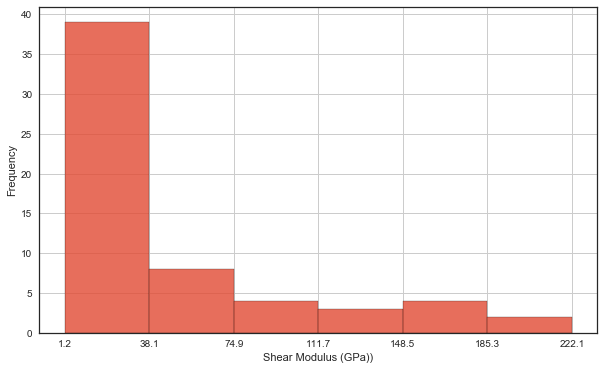

In [28]:
plot_histogram(data['shear'])

plt.xlabel('Shear Modulus (GPa))')
plt.ylabel('Frequency')
#plt.title('Shear Modulus of Solid Periodic Elements')

plt.savefig('assets/elements_histogram.png', dpi=300, bbox_inches='tight')

In [20]:
# Shear Modulus in psi
# 1 Gigapascal is 145038 psi

data['shear_psi'] = data['shear'] * 145038

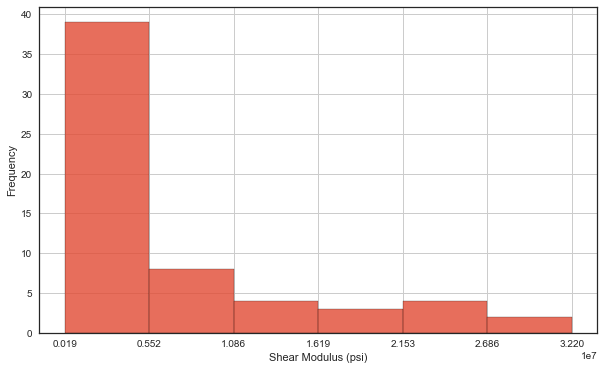

In [27]:
plot_histogram(data['shear_psi'])

plt.xlabel('Shear Modulus (psi)')
plt.ylabel('Frequency')
#plt.title('Shear Modulus of Solid Periodic Elements')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.savefig('assets/elements_histogram_psi.png', dpi=300, bbox_inches='tight')

In [22]:
data['leading'] = data['shear'].astype(str).str[0].astype(int)
data['leading_psi'] = data['shear_psi'].astype(str).str[0].astype(int)

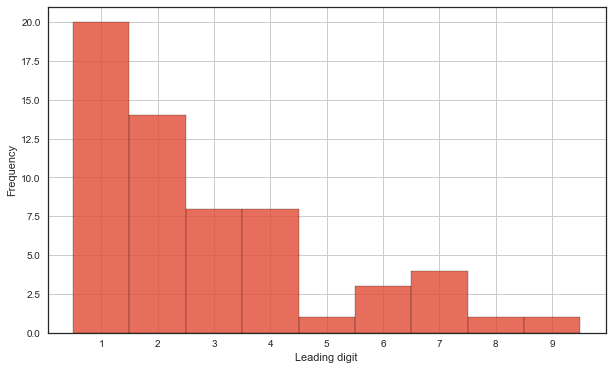

In [23]:
plt.figure(figsize=(10,6))
plt.hist(data['leading'], bins=9, range=(0.5, 9.5), alpha=0.8, histtype='bar', ec='black')
plt.xticks(range(1, 10))
plt.grid(True)

#plt.title('Leading Digits of Periodic Elements\' Shear Modulus in GPa')
plt.xlabel('Leading digit')
plt.ylabel('Frequency')

plt.savefig('assets/digits.png', dpi=300, bbox_inches='tight')

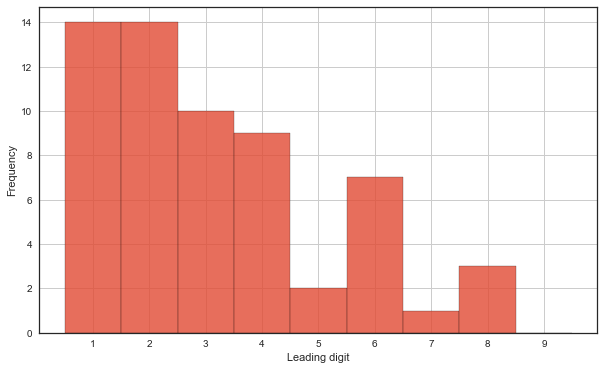

In [24]:
plt.figure(figsize=(10,6))
plt.hist(data['leading_psi'], bins=9, range=(0.5, 9.5), alpha=0.8, histtype='bar', ec='black')
plt.xticks(range(1, 10))
plt.grid(True)

#plt.title('Leading Digits of Periodic Elements\' Shear Modulus in psi')
plt.xlabel('Leading digit')
plt.ylabel('Frequency')

plt.savefig('assets/digits_psi.png', dpi=300, bbox_inches='tight')

In [25]:
data.head()

,number,symbol,name,shear,shear_psi,leading,leading_psi
0,3,Li,lithium,4.2,609159.6,4,6
1,4,Be,beryllium,132.0,19145016.0,1,1
2,11,Na,sodium,3.3,478625.4,3,4
3,12,Mg,magnesium,17.0,2465646.0,1,2
4,13,Al,aluminium,26.0,3770988.0,2,3


In [26]:
data.to_csv('assets/element_data.csv', index=False,
            float_format='%.1f',
            header=['Atomic Number',
                    'Symbol',
                    'Name',
                    'Shear Modulus (GPa)',
                    'Shear Modulus (psi)',
                    'Leading Digit of GPa',
                    'Leaidng Digit of psi'])